## Classification of Handwritten digits using CNN

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
data = datasets.load_digits()
x = data.images
y = data.target

In [3]:
x = x.reshape((x.shape[0], 8, 8, 1))
x = x.astype('float32')/255
y = to_categorical(y)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (8, 8, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [6]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
#Skip this Line

earlystop = EarlyStopping(monitor = 'val_loss', patience = 10)
best_weights = ModelCheckpoint('best_weights.h5', save_best_only = True, monitor = 'val_loss', mode = 'min')

In [8]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_data = (x_test, y_test))#,callbacks = [earlystop, best_weights])

Epoch 1/50
45/45 [==============================] - 0s 4ms/step - loss: 2.2862 - accuracy: 0.2116 - val_loss: 2.2637 - val_accuracy: 0.4639
Epoch 2/50
45/45 [==============================] - 0s 2ms/step - loss: 2.2167 - accuracy: 0.5894 - val_loss: 2.1497 - val_accuracy: 0.7417
Epoch 3/50
45/45 [==============================] - 0s 2ms/step - loss: 2.0250 - accuracy: 0.7307 - val_loss: 1.8819 - val_accuracy: 0.6500
Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: 1.6569 - accuracy: 0.7543 - val_loss: 1.4621 - val_accuracy: 0.7722
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: 1.2448 - accuracy: 0.7996 - val_loss: 1.0962 - val_accuracy: 0.7972
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 0.9253 - accuracy: 0.8358 - val_loss: 0.8546 - val_accuracy: 0.8083
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: 0.7179 - accuracy: 0.8580 - val_loss: 0.7048 - val_accuracy: 0.8500
Epoch 8/50
45/45 [==

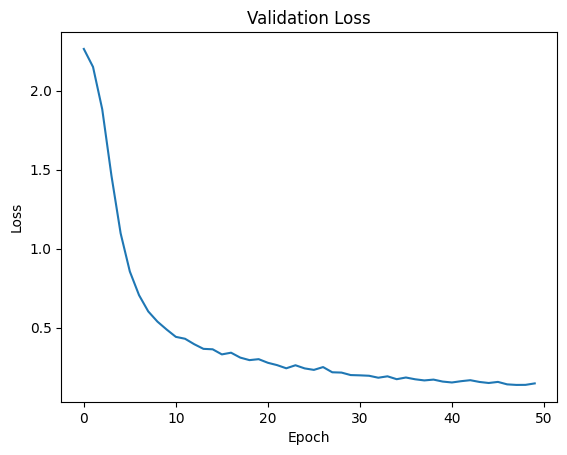

In [9]:
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

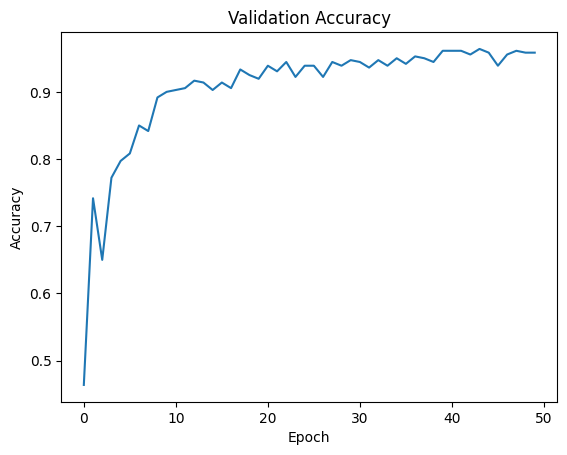

In [10]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [11]:
model.load_weights("best_weights.h5")

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Test Loss: 0.0899047926068306
Test Accuracy: 0.9777777791023254
